# 4V Analytics EDA Assignment

# Import Libraries

In [9]:
import numpy as np 
import pandas as pd
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline
from sklearn.svm import LinearSVC
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
#import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

# Read CSV

In [10]:
Df = pd.read_csv("IMDB-Movie-Data.csv")

# First Five Rows

In [11]:
Df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Info Function

In [12]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# Column Names

In [13]:
Df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

# Rename Columns

In [14]:
#Rename Runtime (Minutes) to Runtime AND Revenue (Millions) to Revenue and update dataframe
Df.rename(columns = {'Runtime (Minutes)':'Runtime', 'Revenue (Millions)': 'Revenue'}, inplace = True)
Df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Average of Revenue

In [15]:
df = Df['Revenue'].mean()
df

82.95637614678897

# Average of RunTime

In [16]:
Df['Runtime'].mean()

113.172

# Shortest Movie 

In [18]:
Df.nsmallest(1, ['Runtime'])

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
793,794,Ma vie de Courgette,"Animation,Comedy,Drama","After losing his mother, a young boy is sent t...",Claude Barras,"Gaspard Schlatter, Sixtine Murat, Paulin Jacco...",2016,66,7.8,4370,0.29,85.0


# Longest Movie

In [19]:
Df.nlargest(1, ['Runtime'])

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.03,NaN


# Null Values in each column

In [20]:
Df.isnull().sum()

Rank             0
Title            0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64

# Genre which has maximum number of movies in dataset

In [23]:
df = Df['Genre'].max()
df

'Thriller,War'

# Total Number of movies in each Genre

In [24]:
Df['Genre'].str.split(',',3).value_counts()

[Action, Adventure, Sci-Fi]     50
[Drama]                         48
[Comedy, Drama, Romance]        35
[Comedy]                        32
[Drama, Romance]                31
                                ..
[Drama, Western]                 1
[Drama, Fantasy, Thriller]       1
[Action, Horror, Romance]        1
[Romance, Sci-Fi]                1
[Mystery, Romance, Thriller]     1
Name: Genre, Length: 207, dtype: int64

# DataFrame With Genre & Rating

In [25]:
Df[['Genre', 'Rating']].head()

,Genre,Rating
0,"Action,Adventure,Sci-Fi",8.1
1,"Adventure,Mystery,Sci-Fi",7.0
2,"Horror,Thriller",7.3
3,"Animation,Comedy,Family",7.2
4,"Action,Adventure,Fantasy",6.2


# Movies with Director Christophe Lourdelet

In [27]:
Df[Df['Director'] == 'Christophe Lourdelet']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


# Movies with Rating Greater than 8.0

In [28]:
Df[Df['Rating'] > 8.0]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0


# Movies with Rating Greater than 8.5 & Year 2008-2014

In [29]:
Df[(Df['Rating'] > 8.0) & (Df['Year'] >= 2008) & (Df['Year'] <= 2014)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
77,78,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.3,959065,120.52,69.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0
83,84,Gone Girl,"Crime,Drama,Mystery",With his wife's disappearance having become th...,David Fincher,"Ben Affleck, Rosamund Pike, Neil Patrick Harri...",2014,149,8.1,636243,167.74,79.0
90,91,Prisoners,"Crime,Drama,Mystery",When Keller Dover's daughter and her friend go...,Denis Villeneuve,"Hugh Jackman, Jake Gyllenhaal, Viola Davis,Mel...",2013,153,8.1,431185,60.96,74.0
92,93,The Help,Drama,An aspiring author during the civil rights mov...,Tate Taylor,"Emma Stone, Viola Davis, Octavia Spencer, Bryc...",2011,146,8.1,342429,169.71,62.0


# Scatter Plot for rating & revenue

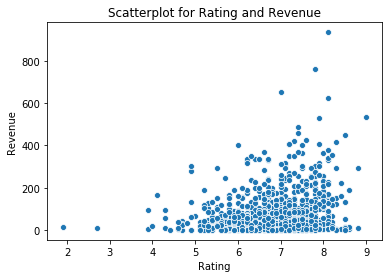

In [30]:
sns.scatterplot(x='Rating', y='Revenue', data=Df).set(title='Scatterplot for Rating and Revenue')
plt.show()